### ⚠️ Roteiro para executar códigos do notebook no Google Colab(oratory) com GPU_

**PASSO 1:** Acessar https://colab.research.google.com/ $\to$ `Upload` $\to$ `escolher arquivo .ipynb`

**PASSO 2:** Acessar MENU `Ambiente de execução` $\to$ `Alterar tipo do ambiente` $\to$ `GPU` $\to$ `Salvar`

**PASSO 3:** `Barra lateral esquerda` $\to$ `Icone de arquivo` $\to$ `Icone de upload` $\to$ `escolher arquivo auxiliar` (ex. `aux.py`)

**PASSOS 4, 5, 6 e 7:** ver células a seguir...

In [ ]:
#### PASSO 4: VER DETALHES DA GPU
#### Descomente a linha abaixo e execute

#!nvidia-smi

In [ ]:
#### PASSO 5: VER VERSÃO CUDA INSTALADA
#### Descomente a linha abaixo e execute

#!nvcc --version 

In [ ]:
#### PASSO 6: INSTALAR versão MXNET com versão CUDA correspondente
#### Descomente uma das linhas abaixo e execute

#!pip install -U mxnet-cu110==1.8.0 
#!pip install -U mxnet-cu101==1.7.0

In [ ]:
#### PASSO 7: VERIFICAR se MXNET "enxerga" a GPU
#### Se estiver enxergando, será impresso algo como gpu(0),
#### caso contrário, será impresso algo como cpu(0)
#### Descomente o código abaixo e execute

#from mxnet import npx
#def try_all_gpus():
#    devices = [npx.gpu(i) for i in range(npx.num_gpus())]
#    return devices if devices else [npx.cpu()]
#try_all_gpus()

## Limitação do _One-hot encoding_

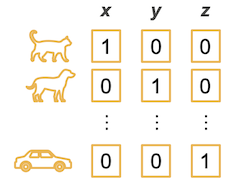

Vetores representativos **não agregam semântica**: $\langle \mathbf{x,y} \rangle = \langle \mathbf{z,y} \rangle = 0$. Ou seja, similaridade do cosseno **entre os vetores de duas palavras diferentes quaisquer** é 0 (zero).

# Solução: pré-treinamento para incorporar semântica

A representação de cada _token_ textual (**_EMBEDDING_**) pode ser pré-treinada a partir de um grande _corpus_.

Uma vez treinadas, elas podem alimentar várias arquiteturas de aprendizagem profunda para diferentes aplicações de PLN. 



# Word2Vec

* Aprende _embedding_ de cada palavra para indicar melhor suas relações de similaridade e analogia $\implies \langle \mathbf{x,y} \rangle > \langle \mathbf{z,y} \rangle$
* Vetor de comprimento fixo
* Implementa dois modelos probabilísticos: _Skip-Gram_ e _Continuous Bag Of Words (CBOW)_

## Modelo Skip-Gram

Assume que uma **palavra é usada para gerar as palavras que a rodeiam** em uma seqüência textual.

(Ex.)

$P(\textrm{"the"},\textrm{"man"},\textrm{"his"},\textrm{"son"}\mid\textrm{"loves"}) = ?$

Resp.

$P(\textrm{"the"}\mid\textrm{"loves"})\cdot P(\textrm{"man"}\mid\textrm{"loves"})\cdot P(\textrm{"his"}\mid\textrm{"loves"})\cdot P(\textrm{"son"}\mid\textrm{"loves"})$



**A GRANDE SACADA** é se aproveitar dessas relações de vizinhança para **APRENDER** o que realmente interessa: a **representação vetorial da palavra** de entrada, que **fica armazenada na matriz de pesos, $W$**, como de costume. De fato, o objetivo final do modelo Skip-Gram não é prever palavras de contexto, mas aprender a representação vetorial inteligente das palavras.

Uma MLP convencional de única camada escondida é usada para aprender essas relações. 

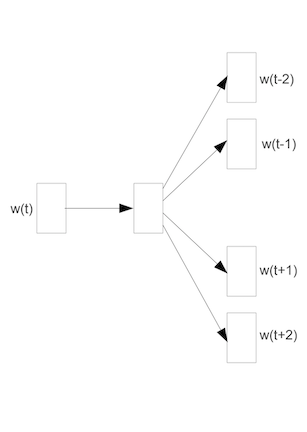

### Exemplo ilustrativo

Considere que o corpus completo é a seguinte sentença apenas: _"The quick brown fox jumps over the lazy dog."_

* Sequência de comprimento $T=9$   
* Vocabulário $|\mathcal{V}|=8$   
* Janela de contexto de largura $m=2$ 

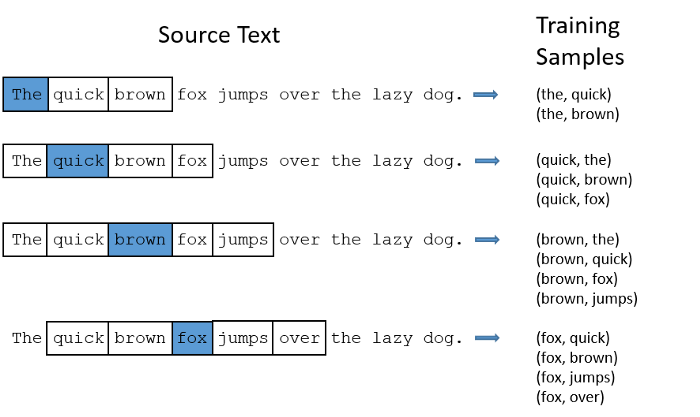

### Exemplo ilustrativo do treinamento

Considere que o corpus completo é a seguinte sentença apenas: _"The man who passes the sentence should swing the sword."_

* Sequência de comprimento $T=10$   
* Vocabulário $|\mathcal{V}|=8$   
* Janela de contexto de largura $m=1$      

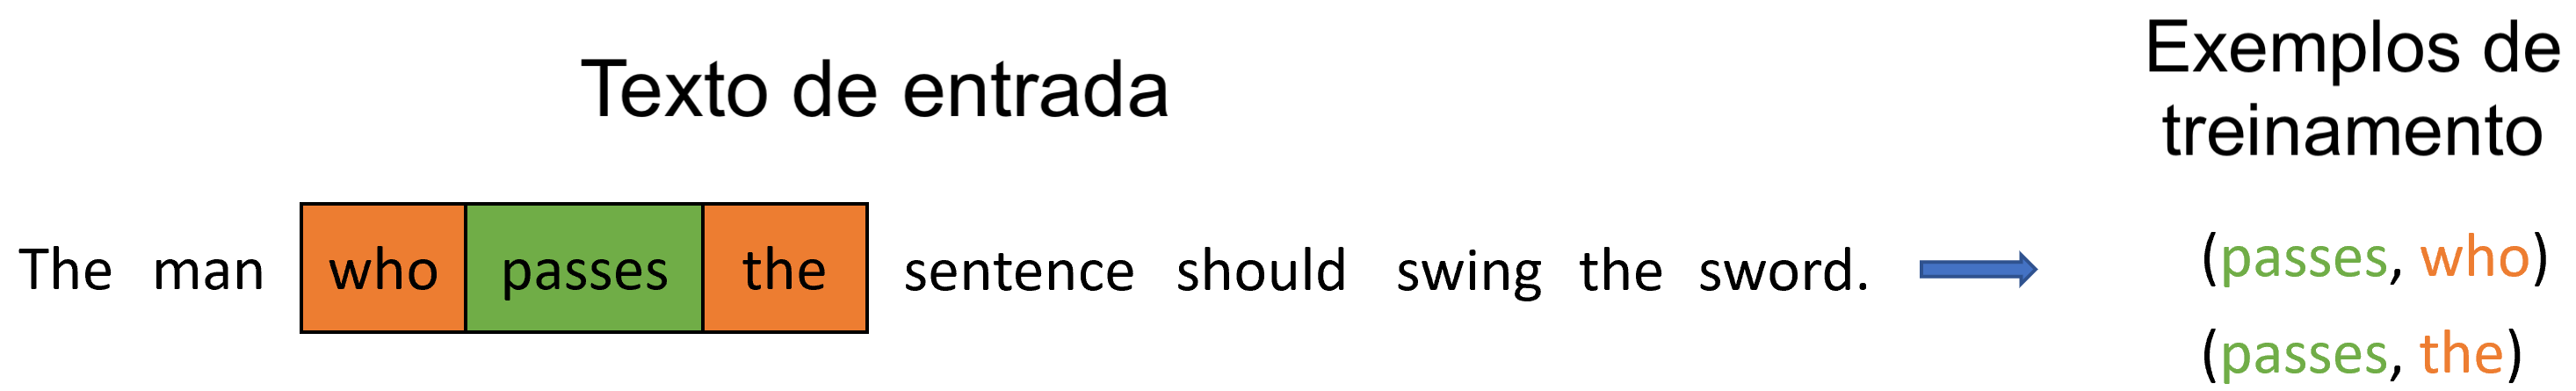

* Camada escondida, $h$, com 3 neurônios

Logo...

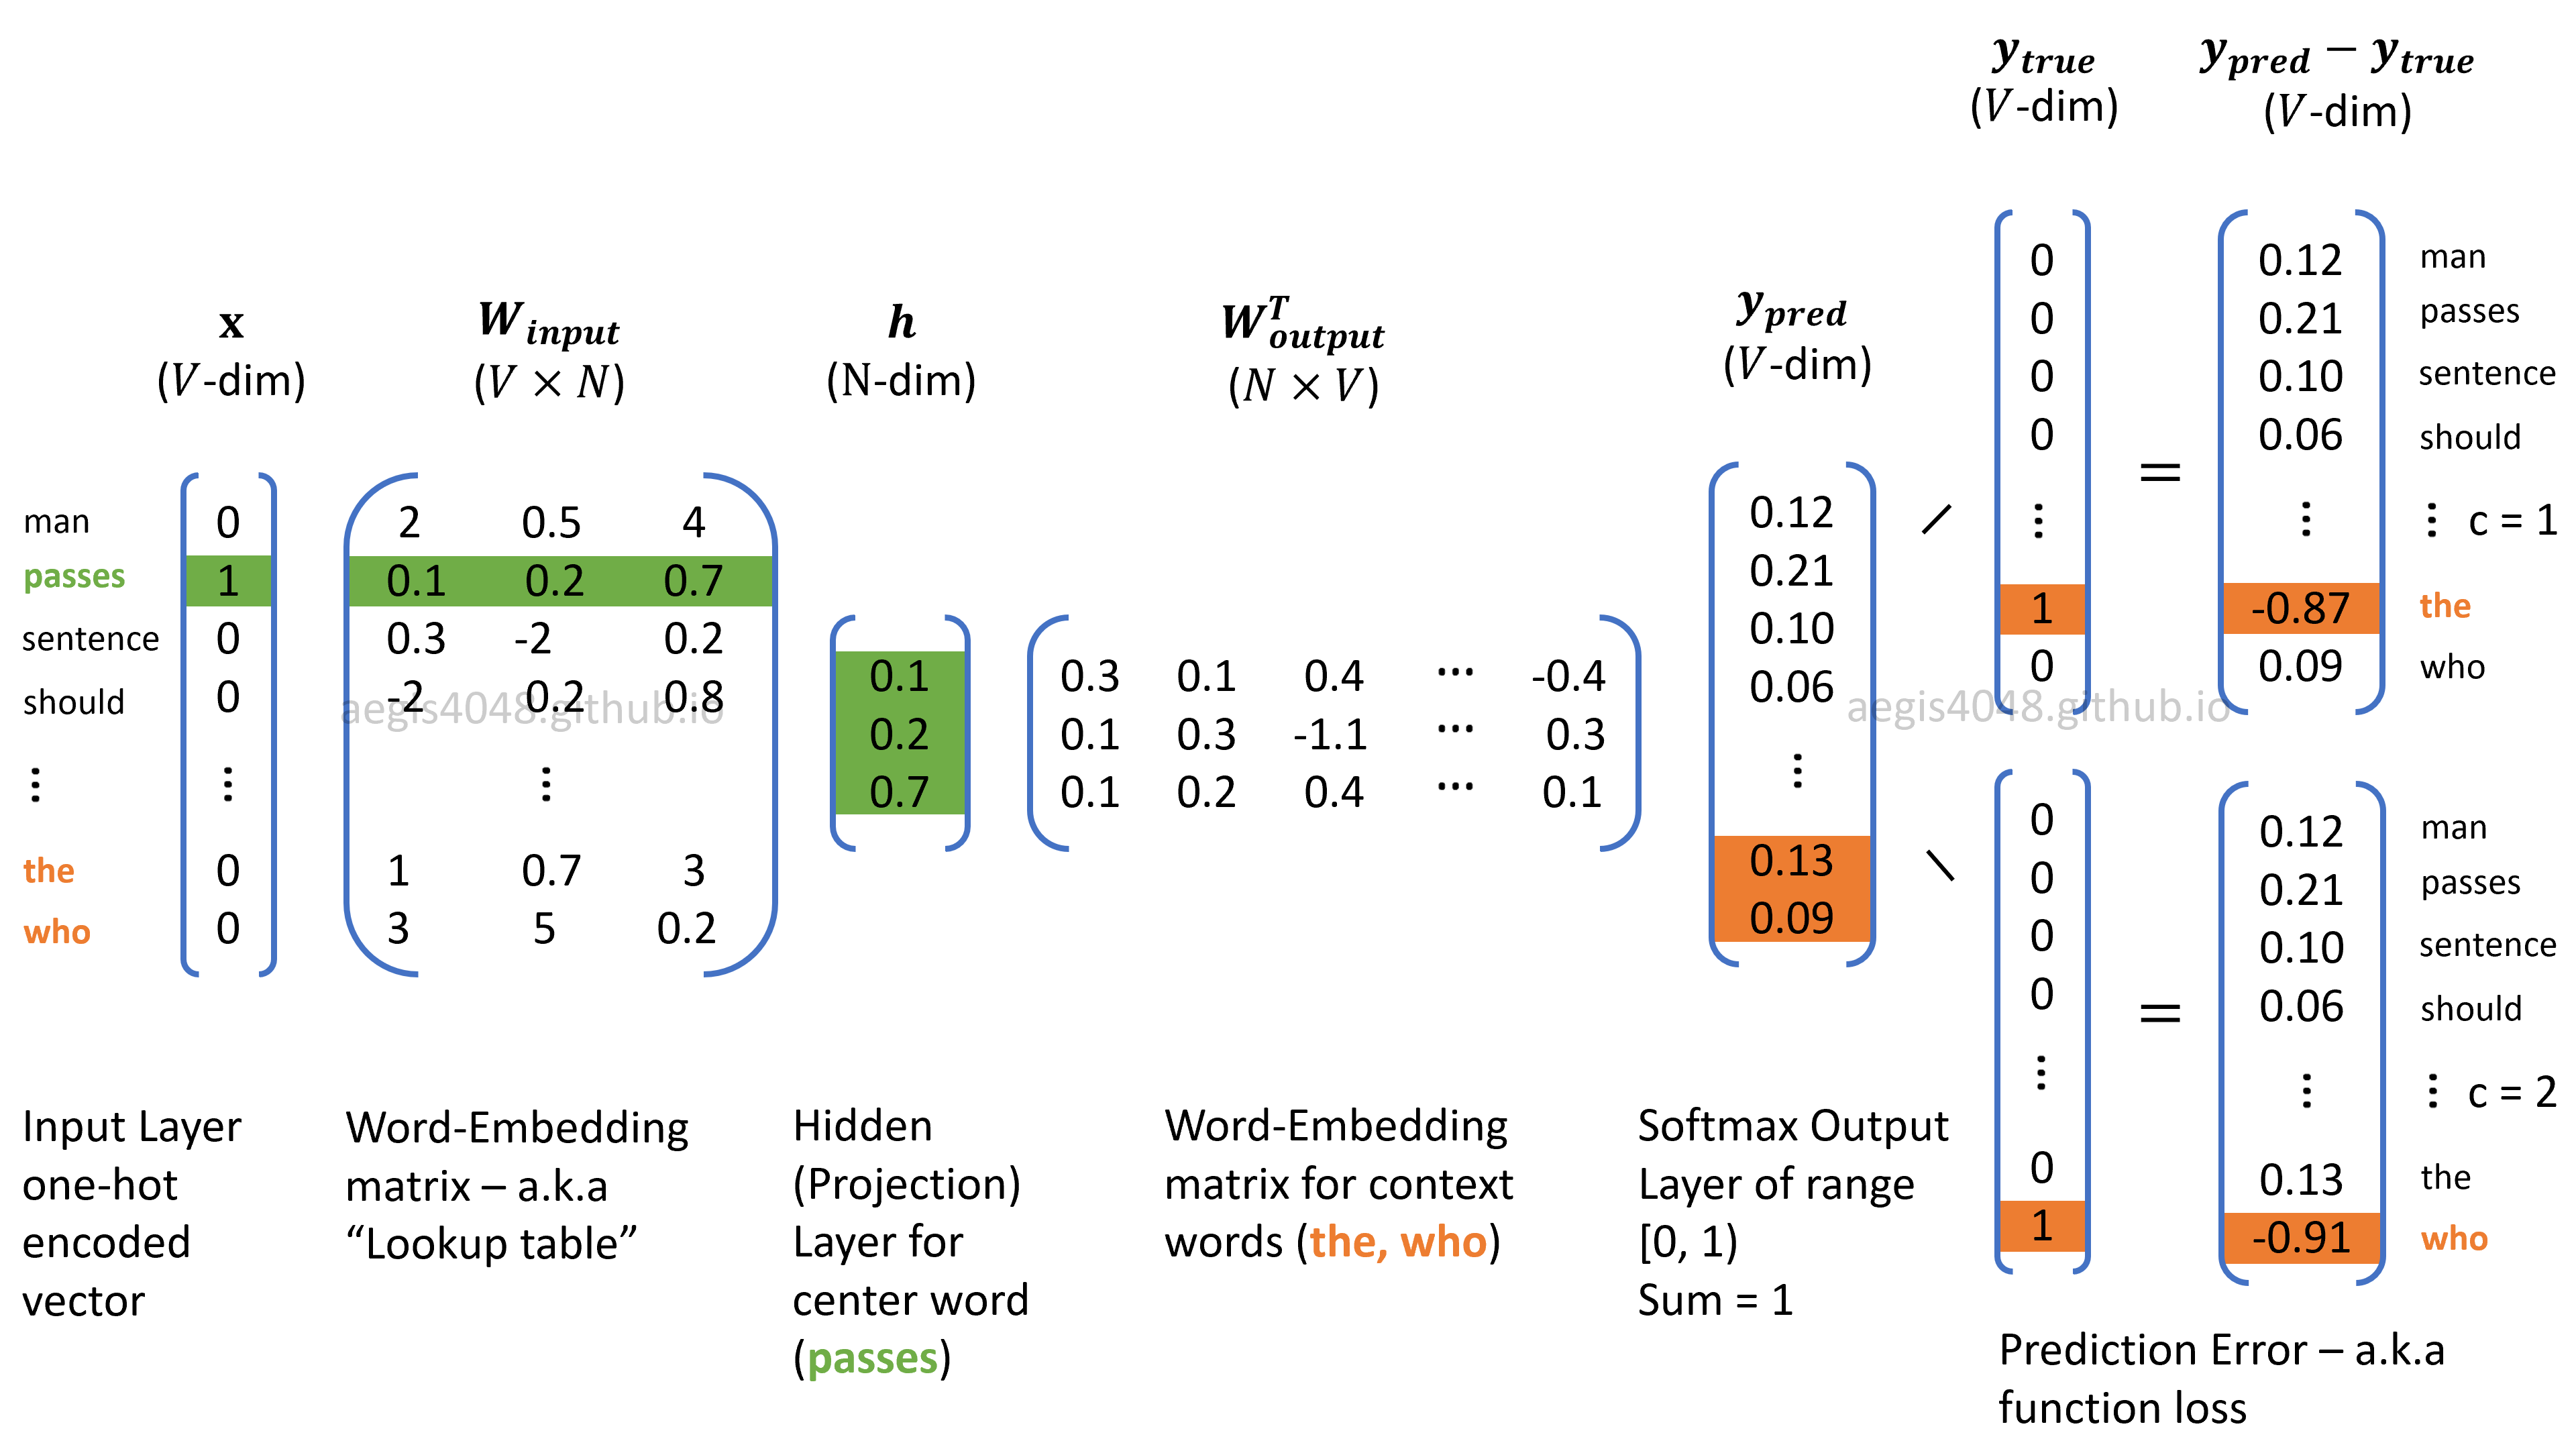

Cada palavra do vocabulário terá uma representação no espaço n-dimensional de ótima qualidade, a depender da qualidade do corpus, naturalmente.

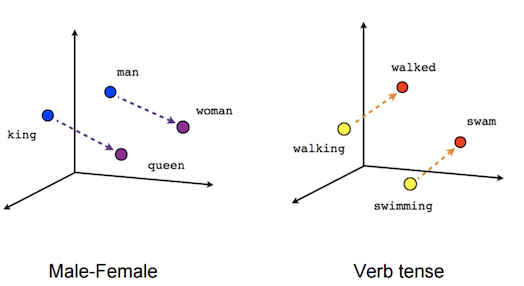

Ex. Resolver analogias!

$vec(Germany)=[1.22, 0.34, −3.82]$   
$vec(capital)=[3.02, −0.93, 1.82]$   
$vec(Berlin)=[4.09, −0.58, 2.01]$   

$vec(Germany) + vec(capital)=[1.22, 0.34, −3.82]+[3.02, −0.93, 1.82]=[4.24, −0.59, −2.00]$

### Formalização

Embedding da palavra $i$ na função de "alvo central": $\mathbf{v}_i\in\mathbb{R}^d$

Embedding da palavra $i$ na função de "contexto": $\mathbf{u}_i\in\mathbb{R}^d$

Então, para uma dada palavra alvo $w_c$ e palavra de contexto $w_o$, a probabilidade condicional é dada pela **operação SOFTMAX** do produto interno vetorial: $$P(w_o \mid w_c) = \frac{\text{exp}(\mathbf{u}_o^\top \mathbf{v}_c)}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)}$$

Onde $\mathcal{V}$ representa todo o vocabulário.

Dada uma sequência de comprimento $T$ e janela de contexto de largura $m$, a função de probabilidade do modelo é a probabilidade conjunta de gerar todas as palavras de contexto dada qualquer palavra central:

$$\prod_{t=1}^{T} \prod_{-m \leq j \leq m,\ j \neq 0} P(w^{(t+j)} \mid w^{(t)})$$

O **treinamento do modelo** então consiste em maximizar essa probabilidade acima (_maximum likelihood estimation_) ou (equivalentemente) minimizar a seguinte função de erro:

$$- \sum_{t=1}^{T} \sum_{-m \leq j \leq m,\ j \neq 0} \text{log}\, P(w^{(t+j)} \mid w^{(t)})$$

Onde, 

$$\log P(w_o \mid w_c) =
\mathbf{u}_o^\top \mathbf{v}_c - \log\left(\sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)\right)$$

E, finalmente, fazemos a atualização dos parâmetros através de SGD, por exemplo:

$$\begin{split}\begin{aligned}
\frac{\partial \text{log}\, P(w_o \mid w_c)}{\partial \mathbf{v}_c}
&= \mathbf{u}_o - \frac{\sum_{j \in \mathcal{V}} \exp(\mathbf{u}_j^\top \mathbf{v}_c)\mathbf{u}_j}{\sum_{i \in \mathcal{V}} \exp(\mathbf{u}_i^\top \mathbf{v}_c)}\\
&= \mathbf{u}_o - \sum_{j \in \mathcal{V}} \left(\frac{\text{exp}(\mathbf{u}_j^\top \mathbf{v}_c)}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)}\right) \mathbf{u}_j\\
&= \mathbf{u}_o - \sum_{j \in \mathcal{V}} P(w_j \mid w_c) \mathbf{u}_j.
\end{aligned}\end{split}$$

## Resolvendo o overhead computacional para dicionários gigantes

Considere um vocabulário de 10.000 palavras e uma camada escondida com 300 neurônios (características): modelo treinado pela Google (Google news dataset) (https://code.google.com/archive/p/word2vec/) $\implies$ Matriz gigante de pesos, todos os quais seriam modificados a cada uma das bilhões de amostras de treinamento.

### Amostragem negativa (_negative sampling_)

Cada amostra de treinamento **modifica apenas uma pequena porcentagem dos pesos**.

Ao treinar a rede sobre o par (_passes_, _who_), a saída deve ser one-hot [0,0,0,...,1] (1 para palavra _who_ e 0 pro resto)

Amostragem negativa $\to$ selecionar aleatoriamente apenas um pequeno número de palavras "negativas" $K$ (exemplo: $K = 5$ palavras) para as quais atualizar os pesos; essas palavras devem ter saída 0. Os pesos da palavra “positiva” (_who_) também será atualizado.

O artigo original sugere: $K = 5–20$ palavras para datasets pequenos e $K=2–5$ para os grandes.

Considerando uma matriz 300 x 10.000 e 6 neurônios de saída $\implies$ 1.800 pesos (apenas 0.06% dos 3 milhões originais).

Essencialmente, a probabilidade de selecionar uma palavra como amostra negativa é proporcional à sua frequência no corpus (isoladamente).

⚠️ Na camada escondida, apenas os pesos da palavra alvo central são atualizados (independetemente de usar Amostragem negativa ou não).

### Formalmente...

**SOFTMAX $\to$ AMOSTRAGEM NEGATIVA COM FUNÇÃO SIGMOID**

$P = \frac{exp(W_{output} \cdot h)}{\sum^V_{i=1}exp(W_{output_{(i)}} \cdot h)} \in \mathbb{R}^{V} \to P = \frac{1}{1+exp(-(\{c_{pos}\} \cup W_{neg}) \cdot h)}
\in \mathbb{R}^{K+1}$

## Modelo CBOW

Conceito inverso ao anterior: assume que uma **palavra é gerada a partir das que a rodeiam** em uma seqüência textual.

(Ex.)

$P(\textrm{"loves"}\mid\textrm{"the"},\textrm{"man"},\textrm{"his"},\textrm{"son"}) = ?$



# Treinamento do Word2Vec

_Corpus_: **Penn Treebank (PTB)** (https://catalog.ldc.upenn.edu/LDC99T42) reune 2.499 histórias de uma coleção de três anos do Wall Street Journal.

In [3]:
import math
import os
import random
from mxnet import gluon, np
import aux as aux
from mxnet.gluon import utils as gutils
import os
import zipfile

# PARTE A: pré-processar um dataset com amostragem negativa e carregar em minibatches

## 1. Download do dataset

In [4]:
sentences = aux.read_ptb()
f'# sentences: {len(sentences)}'

'# sentences: 42069'

## 2. Construção de Vocabulário
Palavras com menos de 10 aparições viram `<unk>`

`Vocab(..., ..., use_special_tokens=False)` $\implies$ `special_tokens = ['<unk>']`       
`Vocab(..., ..., use_special_tokens=True)` $\implies$ `special_tokens = ['<pad>', '<bos>', '<eos>', '<unk>']`

In [5]:
vocab = aux.Vocab(sentences, min_freq=10)
f'tamanho do vocab: {len(vocab)}'

'tamanho do vocab: 6719'

## 3. Subamostragem

Palavras pertencentes a determinadas classes de palavra aparecem com muita frequência em um _corpus_ sem agregar muito significado (ex. artigos, conjunções, preposições, etc.).

A ideia da subamostragem é realizar um _dropout_ dessas palavras mais frequentes a fim de valorizar outras sequências na janela de contexto.

Se $f(w_i)$ é a frequência de aparição da palavra $w_i$, a probabilidade de dropout dessa palavra é:

$$ \mathbb{P}(w_i) = \max\left(1 - \sqrt{\frac{t}{f(w_i)}}, 0\right)$$

Onde a constante $t$ é um hiperparâmetro (ex. $t = 10^{-4}$)

In [6]:
subsampled = aux.subsampling(sentences, vocab)

**Observe o efeito da subamostragem na redução do comprimento das sentenças...**

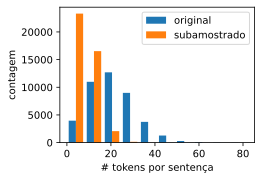

In [7]:
aux.set_figsize()
aux.plt.hist([[len(line) for line in sentences],
              [len(line) for line in subsampled]])
aux.plt.xlabel('# tokens por sentença')
aux.plt.ylabel('contagem')
aux.plt.legend(['original', 'subamostrado']);

In [8]:
def compare_counts(token):
    return 'qtde de "%s": antes=%d, depois=%d' % (token, sum(
        [line.count(token) for line in sentences]), sum(
        [line.count(token) for line in subsampled]))

print(compare_counts('the'))
print(compare_counts('join'))

qtde de "the": antes=50770, depois=2124
qtde de "join": antes=45, depois=45


## 4. Mapear tokens $\to$ índices


In [9]:
corpus = [vocab[line] for line in subsampled]
corpus[0:3]

[[], [0, 2, 392, 32, 2115, 18, 274, 406], [5277, 3054, 1580, 95]]

## 6. Extração de todas as palavras-alvo centrais e respectivas palavras contextuais

Escolha aleatória (dist. uniforme) de um número inteiro a ser usado como tamanho da janela de contexto (entre 1 e o tamanho máximo da janela especificado).

```python
def get_centers_and_contexts(corpus, max_window_size):
    centers, contexts = [], []
    for line in corpus:
        # Cada sentença precisa de pelo menos 2 palavras para formar um par "central - contexto"
        if len(line) < 2:
            continue
        centers += line
        for i in range(len(line)):  # Janela de contexto centrada em i
            # Tamanho da janela definido aleatoriamente
            window_size = random.randint(1, max_window_size) 
            indices = list(
                range(max(0, i - window_size),
                      min(len(line), i + 1 + window_size)))
            # Exclui a palavra alvo central das palavras de contexto
            indices.remove(i)
            contexts.append([line[idx] for idx in indices])
    return centers, contexts
```

**Ex. dataset artificial apenas para ilustrar o uso da função acima**
* 2 sentenças: uma de 7 palavras, outra de 3 palavras

In [10]:
tiny_dataset = [list(range(7)), list(range(7, 10))]
print('dataset (sentenças)', tiny_dataset)
for center, context in zip(*aux.get_centers_and_contexts(tiny_dataset, 2)):
    print('centro', center, 'tem contextos', context)

dataset (sentenças) [[0, 1, 2, 3, 4, 5, 6], [7, 8, 9]]
centro 0 tem contextos [1]
centro 1 tem contextos [0, 2]
centro 2 tem contextos [1, 3]
centro 3 tem contextos [1, 2, 4, 5]
centro 4 tem contextos [2, 3, 5, 6]
centro 5 tem contextos [3, 4, 6]
centro 6 tem contextos [4, 5]
centro 7 tem contextos [8]
centro 8 tem contextos [7, 9]
centro 9 tem contextos [7, 8]


### Pra valer: `max_window_size = 5`

In [11]:
all_centers, all_contexts = aux.get_centers_and_contexts(corpus, 5)
f'# pares centro-contexto: {len(all_centers)}'

'# pares centro-contexto: 352980'

## 7. Amostragem negativa

Para cada par centro-contexto, $K$ palavras negativas ($K=5$ no experimento) são amostradas aleatoriamente. Conforme sugestão do artigo original do Word2Vec, a probabilidade de amostragem da palavra negativa, $P(w)$, deve ser a razão entre a freqüência da palavra $w$ e a qtde total de palavras elevada à potência de $0,75$.

```python
def get_negatives(all_contexts, corpus, K):
    counter = aux.count_corpus(corpus)
    sampling_weights = [counter[i]**0.75 for i in range(len(counter))]
    all_negatives, generator = [], RandomGenerator(sampling_weights)
    for contexts in all_contexts:
        negatives = []
        while len(negatives) < len(contexts) * K:
            neg = generator.draw()
            # Palavras negativas não podem ser palavras de contexto
            if neg not in contexts:
                negatives.append(neg)
        all_negatives.append(negatives)
    return all_negatives

all_negatives = get_negatives(all_contexts, corpus, 5)
```

In [12]:
# K = 5
all_negatives = aux.get_negatives(all_contexts, corpus, 5)

## 8. Leitura em _minibatches_

Extraímos do dataset todas as palavras-alvo centrais `all_centers`, as palavras de contexto `all_contexts` e as palavras negativas `all_negative` para cada palavra-alvo central. 

As palavras serão lidas em minibatches aleatórios.

Em um minibatch, o i-ésimo exemplo inclui uma palavra central e suas correspondentes palavras de contexto e negativas, $n_i$ e $m_i$. Como o tamanho da janela de contexto de cada exemplo pode ser diferente, $n_i + m_i$ será diferente. Ao construir um minibatch, concatenamos as palavras de contexto e as palavras negativas de cada exemplo e adicionamos $0s$ como _paddings_ até que o comprimento das concatenações seja o mesmo.

Entrada para a função `batchify` é uma lista de tuplas contendo: palavras centrais, palavras de contexto e palavras negativas.

```python
def batchify(data):
    max_len = max(len(c) + len(n) for _, c, n in data)
    centers, contexts_negatives, masks, labels = [], [], [], []
    for center, context, negative in data:
        cur_len = len(context) + len(negative)
        centers += [center]
        contexts_negatives += [context + negative + [0] * (max_len - cur_len)]
        masks += [[1] * cur_len + [0] * (max_len - cur_len)]
        labels += [[1] * len(context) + [0] * (max_len - len(context))]
    return (np.array(centers).reshape((-1, 1)), np.array(contexts_negatives),
            np.array(masks), np.array(labels))
```

`masks`: assume valor $0$ ou $1$ $\to$ evitar o efeito do _padding_ no cálculo da função de erro.    
`labels`: distinguir entre contexto e negativos $\to$ elementos correspondendo a palavras de contexto (exemplos positivos) = 1, resto = 0.

**Ex. artificial ilustrativo**

In [13]:
# palavras centrais, palavras de contexto, palavras negativas
x_1 = (1, [2, 2], [3, 3, 3, 3])
x_2 = (1, [2, 2, 2], [3, 3])
batch = aux.batchify((x_1, x_2))

names = ['centers', 'contexts_negatives', 'masks', 'labels']
for name, data in zip(names, batch):
    print(name, '=', data)

centers = [[1.]
 [1.]]
contexts_negatives = [[2. 2. 3. 3. 3. 3.]
 [2. 2. 2. 3. 3. 0.]]
masks = [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0.]]
labels = [[1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


## 9. Juntando tudo

`load_data_ptb` lê o datatset PTB e retorna um iterador para os dados 

In [14]:
def load_data_ptb(batch_size, max_window_size, num_noise_words):
    num_workers = aux.get_dataloader_workers()
    sentences = aux.read_ptb()
    vocab = aux.Vocab(sentences, min_freq=10)
    subsampled = aux.subsampling(sentences, vocab)
    corpus = [vocab[line] for line in subsampled]
    all_centers, all_contexts = aux.get_centers_and_contexts(
        corpus, max_window_size)
    all_negatives = aux.get_negatives(all_contexts, corpus, num_noise_words)
    dataset = gluon.data.ArrayDataset(all_centers, all_contexts,
                                      all_negatives)
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True,
                                      batchify_fn=aux.batchify,
                                      num_workers=num_workers)
    return data_iter, vocab

In [15]:
data_iter, vocab = load_data_ptb(512, 5, 5)
for batch in data_iter:
    for name, data in zip(names, batch):
        print(name, 'shape:', data.shape)
    break

centers shape: (512, 1)
contexts_negatives shape: (512, 60)
masks shape: (512, 60)
labels shape: (512, 60)


# PARTE B: treinamento propriamente dito 

# Modelo Skip-Gram

In [16]:
from mxnet import autograd, gluon, np, npx
from mxnet.gluon import nn
import aux as aux

npx.set_np()

batch_size, max_window_size, num_noise_words = 512, 5, 5
data_iter, vocab = load_data_ptb(batch_size, max_window_size,
                                     num_noise_words)

## 1. Inicializar parâmetros do modelo

Camada H ($N$ neurônios):      
* Matriz de embedding p/ palavra central: $\mathcal{V}$ x $N$ (`input_dim` x `output_dim`) 

Camada Saída:   
* Matriz de embedding p/ palavras de contexto: $N$ x $\mathcal{V}$

In [17]:
embed_size = 100
net = nn.Sequential()
net.add(nn.Embedding(input_dim=len(vocab), output_dim=embed_size),
        nn.Embedding(input_dim=len(vocab), output_dim=embed_size))

## 2. Skip-Gram - Cálculo Forward

Transforma os índices de palavras para vetores de palavras via camada de embeddings. 

In [18]:
def skip_gram(center, contexts_and_negatives, embed_v, embed_u):
    v = embed_v(center)
    u = embed_u(contexts_and_negatives)
    pred = npx.batch_dot(v, u.swapaxes(1, 2))
    return pred

## 3. Função de erro: _Binary Cross Entropy_

In [19]:
loss = gluon.loss.SigmoidBCELoss()

# Ex.
pred = np.array([[.5]*4]*2)
label = np.array([[1,0,1,0]]*2)
mask = np.array([[1, 1, 1, 1], [1, 1, 0, 0]])
# Quando mask = 0, não participa no cálculo do erro a fim de evitar o efeito do padding no erro
# Normalizar o erro em cada exemplo em virtude de diferentes comprimentos
print('Sem normalizar: ', loss(pred, label, mask))
print('Normalizando: ', loss(pred, label, mask) / mask.sum(axis=1) * mask.shape[1])

Sem normalizar:  [0.724077  0.3620385]
Normalizando:  [0.724077 0.724077]


## 4. Treinamento

In [20]:
def train(net, data_iter, lr, num_epochs, device=aux.try_gpu()):
    net.initialize(ctx=device, force_reinit=True)
    trainer = gluon.Trainer(net.collect_params(), 'adam',
                            {'learning_rate': lr})
    animator = aux.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs])
    metric = aux.Accumulator(2)  # Sum of losses, no. of tokens
    for epoch in range(num_epochs):
        timer, num_batches = aux.Timer(), len(data_iter)
        for i, batch in enumerate(data_iter):
            center, context_negative, mask, label = [
                data.as_in_ctx(device) for data in batch]
            with autograd.record():
                pred = skip_gram(center, context_negative, net[0], net[1])
                l = (loss(pred.reshape(label.shape), label, mask) /
                     mask.sum(axis=1) * mask.shape[1])
            l.backward()
            trainer.step(batch_size)
            metric.add(l.sum(), l.size)
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[1],))
    print(f'loss {metric[0] / metric[1]:.3f}, '
          f'{metric[1] / timer.stop():.1f} tokens/sec on {str(device)}')

loss 0.374, 17720.0 tokens/sec on cpu(0)
CPU times: user 6min 44s, sys: 58.5 s, total: 7min 42s
Wall time: 8min 16s


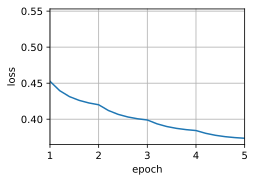

In [21]:
%%time
lr, num_epochs = 0.01, 5
train(net, data_iter, lr, num_epochs)

## Exemplo de aplicação: palavras relacionadas semanticamente

Uso de similaridade do cosseno: $[-1, 1]$   
Retorna as k palavras mais similares a uma dada palavra passada.

In [23]:
def get_similar_tokens(query_token, k, embed):
    W = embed.weight.data()
    x = W[vocab[query_token]]
    # Similaridade do cosseno
    cos = np.dot(W, x) / np.sqrt(np.sum(W * W, axis=1) * np.sum(x * x) + 1e-9)
    topk = npx.topk(cos, k=k + 1, ret_typ='indices').asnumpy().astype('int32')
    for i in topk[1:]:  # Remove as palavras de entrada
        print(f'cosine sim={float(cos[i]):.3f}: {vocab.idx_to_token[i]}')

get_similar_tokens('chips', 3, net[0])

cosine sim=0.491: memory
cosine sim=0.435: machine
cosine sim=0.430: desktop


## Outros modelos de embedding

* Insensível ao contexto: **Word2Vec**, FastText e GloVe
Ex.    
"go to the bank to deposit some money”    
"go to the bank to sit down"   

* Sensível ao Contexto Bidirecionalmente e Arquitetura específica de Tarefa: ELMo 

* Sensível ao Contexto Unidirecionalmente e Arquitetura independente de Tarefa: GPT     
Ex.   
"_i went to the_ <u>bank</u> to deposit cash"    
"_i went to the_ <u>bank</u> to sit down" 

* Melhor dos dois mundos: Sensível ao Contexto Bidirecionalmente e Arquitetura independente de Tarefa: **BERT**

# Referências para estudo

## Seção 14.1, 14.2, 14.3 e 14.4 de [Dive into Deep Learning](https://d2l.ai/index.html)